<a href="https://colab.research.google.com/github/Rabindrajena/diabetic-prediction/blob/main/Diabetes_Prediction_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🩺 Diabetes Prediction using Logistic Regression
## An End-to-End Machine Learning Project

## 📌 1. Introduction

Diabetes is one of the most common chronic diseases worldwide and early diagnosis plays a crucial role in preventing severe health complications.

With the increasing availability of healthcare data, **machine learning models** can assist medical professionals by identifying patterns that indicate the likelihood of diabetes.

In this project, we build an **end-to-end machine learning pipeline** using **Logistic Regression** to predict whether a patient has diabetes based on diagnostic measurements.
The project covers everything from **data preprocessing** and **exploratory data analysis to model training, evaluation, and deployment** using **Streamlit**.

**Why Logistic Regression?**

Logistic Regression is a widely used classification algorithm in healthcare because it is:

* Easy to interpret

* Computationally efficient

* Capable of providing probabilistic outputs

## 📌 2. Dataset Overview

We use the **Pima Indians Diabetes Database**, a popular dataset for binary classification tasks in healthcare.

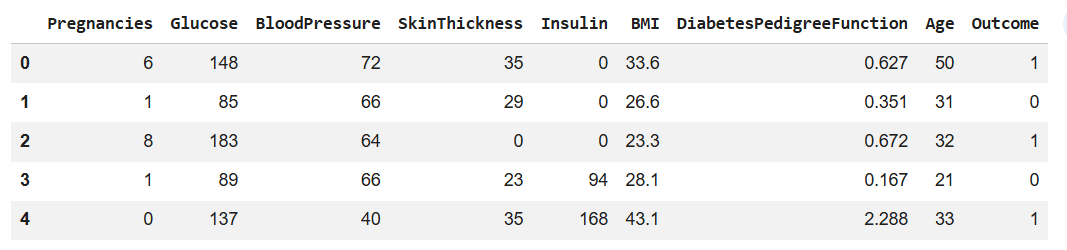
### 🔹 Dataset Details
* **Source**: UCI Machine Learning Repository

* **Number of Samples**: 768

* **Number of Features**: 8

* **Target Variable**: Outcome

* **0** → Non-Diabetic

* **1** → Diabetic

### 🔹 Feature Description
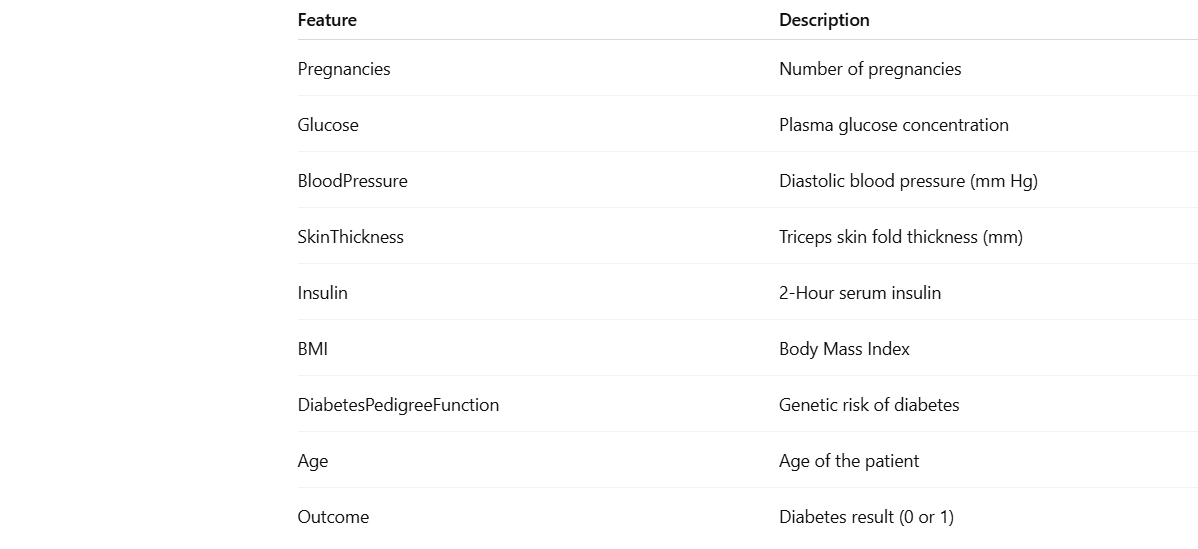

**⚠️ Important Observation:**
Some features contain **zero values**, which are **medically impossible** (e.g., glucose or BMI = 0). These values must be handled during data preprocessing.

## 📌 3. Importing Required Libraries

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

# Model saving
import joblib

# Ignore warnings for clean output
import warnings
warnings.filterwarnings('ignore')


# Downloading the Data

We'll use the **opendatasets** library. to download the data from **Kaggle** directly within Jupyter. Let's install and import opendatasets.

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
od.version()

'0.1.22'

The dataset can now be downloaded using od.download. When you execute **od.download**, you will be asked to provide your **kaggle username and API key**.

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database'

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rabindrakumarjena
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


100%|██████████| 8.91k/8.91k [00:00<00:00, 7.50MB/s]

##📌 4. Loading the Dataset

In [4]:
# Load dataset
# df = pd.read_csv('/content/pima-indians-diabetes-database/diabetes.csv')
df = pd.read_csv('diabetes.csv')

# Display first 5 rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##📌 5. Basic Dataset Inspection

In [5]:
# Dataset shape
df.shape

(768, 9)

In [6]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 🔍 Observation

The dataset **does not contain any explicit null (NaN) values** in any of the features.

In [7]:
# Statistical summary
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 🧠 Key Insight

Although the dataset does not contain null values, several medical attributes include invalid zero entries. These values do not represent true measurements and must be handled carefully to improve model reliability.

In [8]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


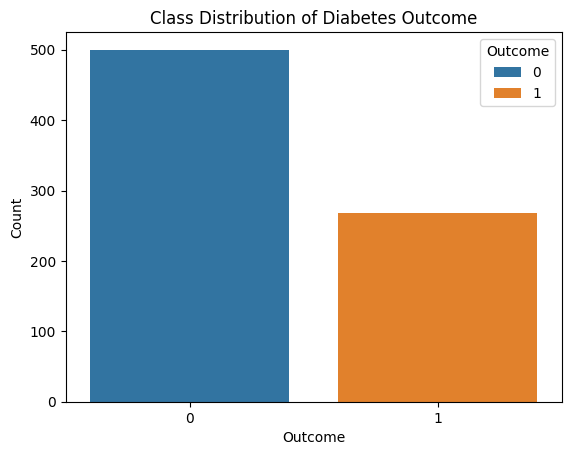

In [9]:
sns.countplot(x='Outcome', data=df,hue='Outcome')
plt.title('Class Distribution of Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

## 📊 Interpretation

Out of 768 total samples:

* **~65%** belong to the Non-Diabetic class

* **~35%** belong to the Diabetic class

This indicates a **moderate class imbalance**, but not a severe one.

## 📌 Handling Invalid Zero Values

As identified in the statistical analysis, several medical features contain **zero values**, which are **physiologically impossible** and do not represent valid measurements.

Although the dataset does not contain explicit missing values (NaN), these zero values act as **implicit missing data** and must be handled carefully.

## 🔍 Identifying Features with Invalid Zero Values

Based on domain knowledge and data inspection, the following features cannot logically have zero values:

In [10]:
invalid_zero_features = [
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI'
]


Let’s check how many zero values exist in each of these features.

In [11]:
for feature in invalid_zero_features:
    print(f"{feature}: {(df[feature] == 0).sum()}")


Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


## 🧠 Key Insights
### 🔹 Insulin & SkinThickness

* Nearly **50%** of Insulin values are zero

* Almost **30%** of SkinThickness values are zero

👉 Dropping these rows would result in **significant data loss**, which is undesirable for a relatively small dataset.

### 🔹 Glucose, BloodPressure & BMI

* Zero values occur infrequently

* However, they are **medically impossible** and must still be corrected

## 📌 Preprocessing Decision

Instead of:
❌ Dropping rows
❌ Applying complex imputation models

We chose to:
✔ Treat zeros as implicit missing values
✔ Replace them using **median imputation**

## 🧠 Why Use Median Imputation?

Instead of removing rows or using mean values, we replace invalid zeros with the **median** of the respective feature.

**Reasons:**

* Median is **robust to outliers**

* Several features (especially Insulin) are **highly skewed**

* Preserves the overall data distribution

This approach ensures:

* Minimal distortion of data

* Better stability for Logistic Regression

## 🔧 Replacing Invalid Zeros with Median Values



In [12]:
# Replace invalid zero values with median
for feature in invalid_zero_features:
    median_value = df.loc[df[feature] != 0, feature].median()
    df[feature] = df[feature].replace(0, median_value)


## 🔍 Verify the Changes

In [13]:
# Verify no zero values remain in the specified features
for feature in invalid_zero_features:
    print(f"{feature}: {(df[feature] == 0).sum()}")


Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0


## 📌 Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps us understand the **distribution, relationships, and patterns** within the dataset before training a machine learning model.

At this stage, our data is:
✔ Clean
✔ Medically valid
✔ Ready for visualization

### 📊 1. Feature Distribution Analysis

Understanding feature distributions helps identify:

* Skewness

* Outliers

* Scale differences

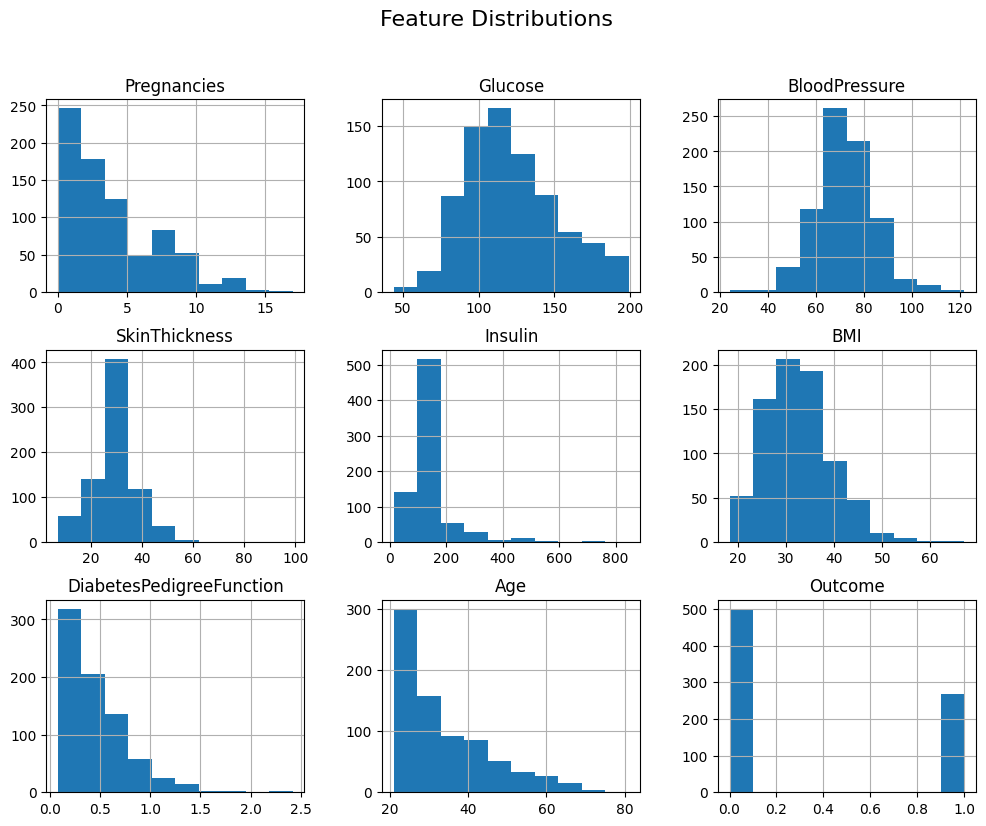

In [14]:
df.hist(figsize=(12, 9))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

EDA revealed varying feature scales and skewed distributions, reinforcing the need for feature scaling and robust evaluation metrics when applying Logistic Regression.

### 📌 2. Correlation Analysis

Correlation helps us understand how strongly features are related to the target variable.

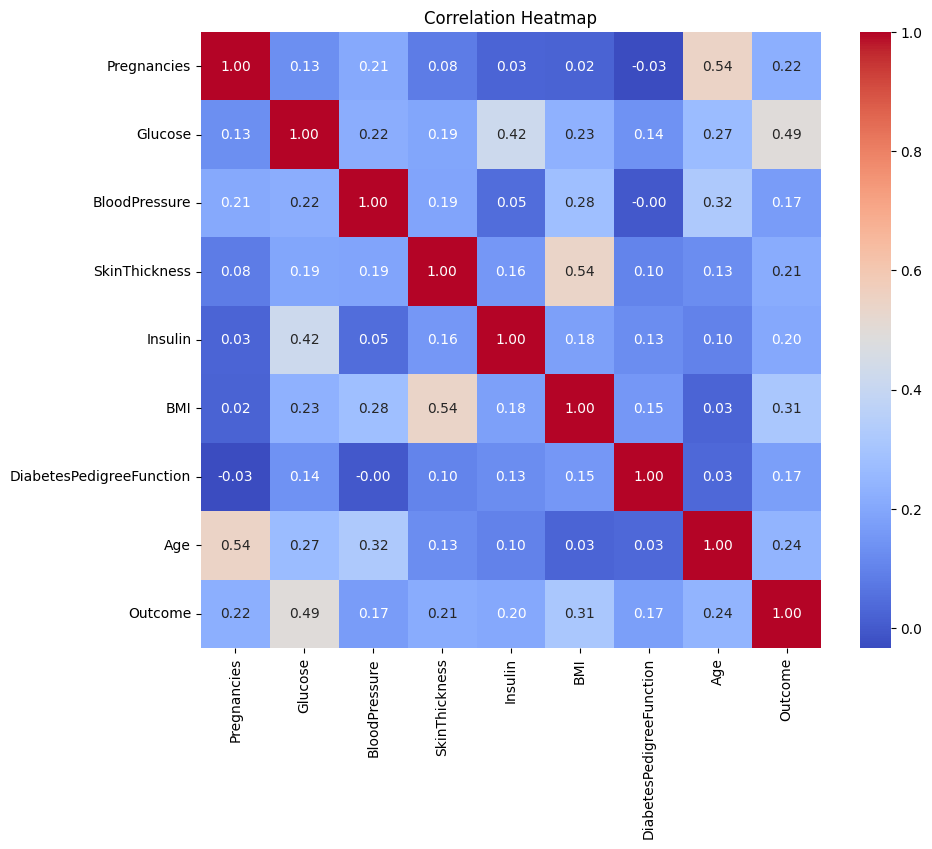

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#### 🔍 Key Correlation Insights

* **Glucose** shows the strongest positive correlation with diabetes outcome

* **BMI** and **Age** have moderate positive correlation

* **Insulin** shows weak correlation due to high variability

This confirms that:
👉 Logistic Regression is suitable
👉 No extreme multicollinearity exists

### 📌 3. Feature vs Target Analysis

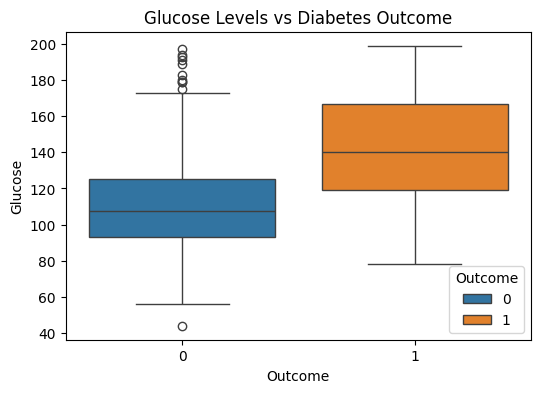

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Outcome', y='Glucose', data=df,hue='Outcome')
plt.title('Glucose Levels vs Diabetes Outcome')
plt.show()

#### 🔍 Interpretation

Patients with diabetes generally have:

* Higher glucose levels

* Wider glucose variability

This aligns with real-world medical knowledge, increasing confidence in the dataset.


### 📊 Interpretation of Visual Insights from the Dataset

This is exactly what we observe in our visual analysis. From the correlation heatmap and distribution plots, **Glucose** shows a strong positive correlation with the target variable (Outcome). This aligns perfectly with real-world medical understanding, as blood glucose level is the primary indicator used to diagnose diabetes.

**Age** shows a **moderate correlation** with the target feature. In real-life scenarios, the probability of developing diabetes increases with age due to metabolic and lifestyle changes. However, in our dataset, most individuals fall within the **25–40 age range**, which reduces the overall variation and results in a moderate rather than strong correlation with the outcome.

A similar pattern is observed for **Pregnancies**. Although the number of pregnancies is a known risk factor for diabetes (especially gestational diabetes), most individuals in the dataset lie in the **0–5 pregnancy range**. This limited spread explains why the correlation with the target variable is moderate.

Overall, these observations demonstrate that the statistical relationships observed in our dataset are **consistent with real-world medical knowledge**, validating the quality of our exploratory data analysis.

### 🧠 EDA Summary

✔ Key features show meaningful relationships with the target
✔ No extreme multicollinearity detected
✔ Dataset is well-suited for Logistic Regression

## Data Preprocessing

### Feature Scaling

#### Why Feature Scaling is Important?

Logistic Regression is a **distance-based algorithm**.
This means features with larger numeric ranges can **dominate** the learning process.

#### Example from our dataset:

* Glucose → values up to ~200

* Insulin → values up to ~800

* DiabetesPedigreeFunction → mostly < 2

Without scaling:

The model may give more importance to Insulin just because its values are larger — **not because it’s more important**.

👉 **Solution:** Feature Scaling

#### Which Scaling Method to Use?

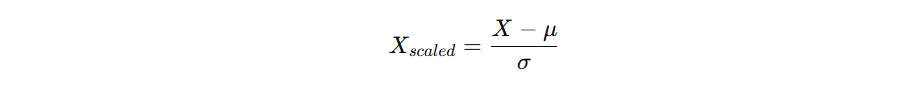

#### Why StandardScaler?

* Logistic Regression **assumes normally distributed features**

* Works well with optimization algorithms (Gradient Descent)

* Common industry practice

✅ Mean = 0
✅ Standard Deviation = 1

### Separate Features and Target

In [17]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [18]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,125,33.6,0.627,50
1,1,85,66,29,125,26.6,0.351,31
2,8,183,64,29,125,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,125,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,29,125,30.1,0.349,47


In [19]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


### Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### Why this matters:

* **80% training / 20% testing** → standard practice

* random_state=42 → reproducibility

* stratify=y → preserves class balance (important since data is slightly imbalanced)

### Apply Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Note:

We **fit the scaler only on training data** to prevent data leakage.

The same transformation is then applied to the test set.


### 🧠 Logistic Regression: Intuition Before Code

Logistic Regression is a **classification algorithm** used to estimate the probability that an observation belongs to a particular class.

In our case, it predicts:

**Probability of a patient having diabetes**

Unlike linear regression, Logistic Regression uses a **sigmoid function** to map values between **0 and 1**, making it ideal for binary classification problems.

🔢 The Sigmoid Function (Conceptual)
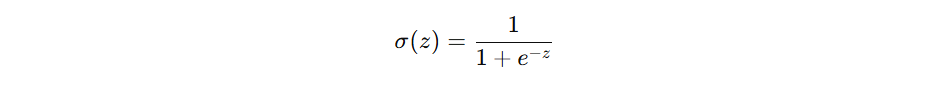
	​


* Output close to **0** → Non-Diabetic

* Output close to **1** → Diabetic

The model learns weights for each feature and combines them to estimate this probability.

You can interpret more about [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) here.

### Train Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    solver='liblinear',
    C=1.0 or higher,
    penalty='l2',
    class_weight='balanced',
    max_iter=1000
)

log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

### Make Predictions

In [23]:
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

In [ ]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [24]:
y_pred_proba

array([0.73361216, 0.2123038 , 0.43999259, 0.38331017, 0.05445995,
       0.28185036, 0.65641814, 0.96167743, 0.13212296, 0.90693098,
       0.39540973, 0.62560235, 0.20024287, 0.17418773, 0.39912962,
       0.49641814, 0.83190538, 0.13309942, 0.88803625, 0.18182409,
       0.24621837, 0.85547369, 0.26921301, 0.96743182, 0.70856485,
       0.02177943, 0.77027188, 0.06858119, 0.44943851, 0.05978986,
       0.07508433, 0.06352783, 0.62109988, 0.79284892, 0.93572532,
       0.21889449, 0.48954704, 0.09903034, 0.8782537 , 0.76124918,
       0.44400857, 0.17520235, 0.15896261, 0.40082459, 0.2429066 ,
       0.56963633, 0.20648449, 0.16875657, 0.80957844, 0.4779588 ,
       0.75149115, 0.82668978, 0.59883346, 0.10046809, 0.66354212,
       0.52773281, 0.84713582, 0.34065205, 0.87067303, 0.22884204,
       0.90128021, 0.34563996, 0.08000455, 0.94078473, 0.0534455 ,
       0.27353288, 0.94356921, 0.02818401, 0.41114271, 0.81243853,
       0.27415113, 0.15642446, 0.49612466, 0.61208202, 0.05557

### Model Evaluation

#### ✅ Accuracy


In [25]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7337662337662337

Accuracy gives the overall correctness of predictions but does not capture class-wise performance.

#### ✅ Confusion Matrix

We can learn more about [confusion matrix](https://www.geeksforgeeks.org/machine-learning/confusion-matrix-machine-learning/) here.

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[75, 25],
       [16, 38]])

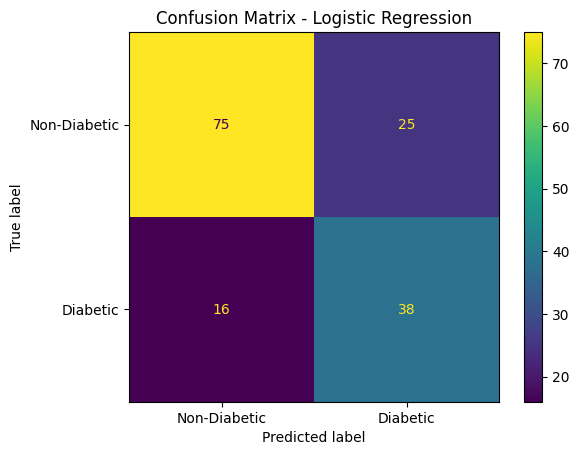

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Non-Diabetic', 'Diabetic']
)

disp.plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


The model predicted 16 patients as non-diabetic but in actual they are diabetic patients, and this is not quite bad.

#### ✅ Classification Report

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79       100
           1       0.60      0.70      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154



This provides:

* Precision

* Recall

* F1-score

Recall is especially important in medical problems, as failing to identify a diabetic patient can be costly.

We can see that the recall for class 1 is 70% and it is not bad.


✅ ROC-AUC Curve

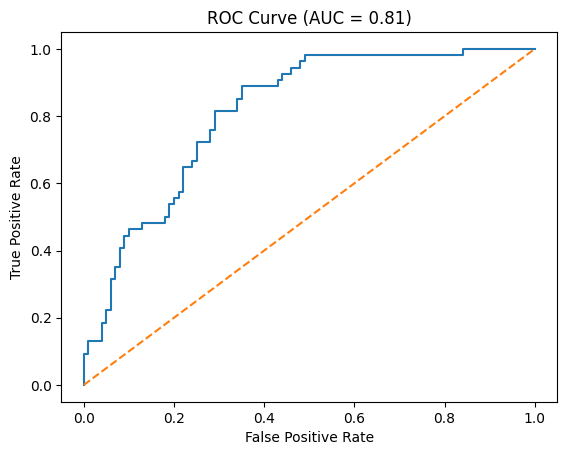

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.show()


An AUC of 0.81 shows that the model has strong class separation, independent of the chosen decision threshold.

## 🔨Improve our model

We can improve our model by adjusting the threshold value.

### Adjust the Decision Threshold

The **default threshold = 0.5**:

If probability ≥ 0.5 → Predict 1 (Diabetic)

If probability < 0.5 → Predict 0 (Non-Diabetic)


### 🔧 What if we LOWER the threshold?

Let’s set:

threshold = 0.4

### 🧠 Why threshold matters A LOT in medical problems

In medical diagnosis:

* **False Negative = dangerous**

* **False Positive = manageable**

So we **intentionally lower the threshold** to:

Catch more sick people, even if we flag a few healthy ones.

This is **not cheating**.
This is **domain-aware modeling**.

In [30]:
threshold = 0.4
y_pred_custom = (y_pred_proba >= threshold).astype(int)

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_custom)
cm


array([[66, 34],
       [ 9, 45]])

We can see the FN is 9 instead of 16, it's a good news for us the model is trying to identifying the dibetic patients.

### Confusion matrix

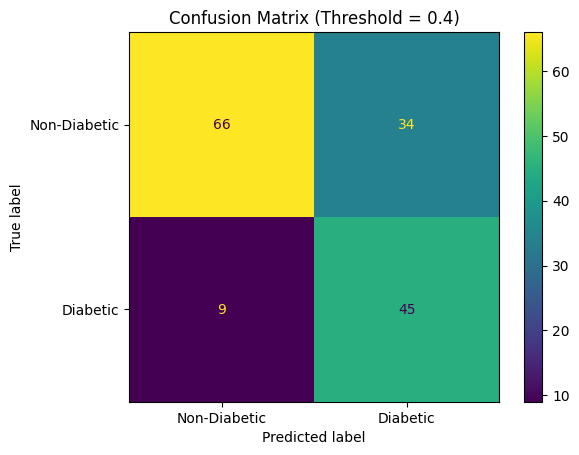

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_custom)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Non-Diabetic', 'Diabetic']
)

disp.plot()
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.show()


### Classification Report

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       0.88      0.66      0.75       100
           1       0.57      0.83      0.68        54

    accuracy                           0.72       154
   macro avg       0.72      0.75      0.72       154
weighted avg       0.77      0.72      0.73       154



### 📊 What changed (numbers with meaning)

After lowering the threshold:

* **False Negatives = 9 ⬇️**
(from 16 → 9)

* **Recall (Diabetic = 1) = 0.83 🔥**
→ We now correctly identify **83% of diabetic patients**

This is a **massive real-world improvement**.

### 🧠 Why this is a BIG deal (real-life interpretation)

Out of every **100 diabetic patients:**

* Before → we miss **~16**

* After threshold tuning → we miss **~9**

That means:

**7 more people get early diagnosis**

In healthcare terms, that’s huge.

### Feature Importance

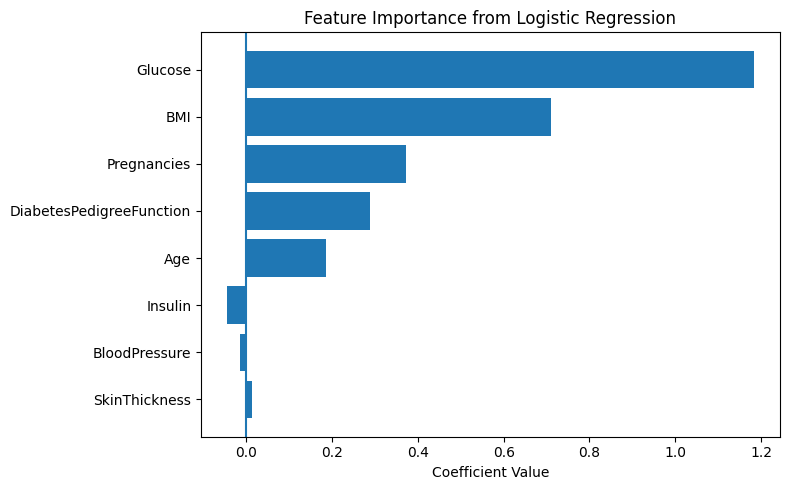

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Create coefficient DataFrame
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": log_reg.coef_[0]
})

# Sort by absolute coefficient value (DESCENDING)
coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="Abs_Coefficient", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(coef_df["Feature"], coef_df["Coefficient"])
plt.axvline(0)  # reference line
plt.xlabel("Coefficient Value")
plt.title("Feature Importance from Logistic Regression")
plt.gca().invert_yaxis()  # <-- makes highest appear on top
plt.tight_layout()
plt.show()


The analysis shows that glucose level is the most influential feature, followed by BMI and number of pregnancies. Age and diabetes pedigree function also contribute moderately, reflecting increased risk with aging and genetic predisposition.

Features such as insulin, blood pressure, and skin thickness exhibit weaker influence, indicating that they add limited additional predictive power once dominant risk factors like glucose and BMI are considered.

Overall, the coefficient analysis aligns well with established medical knowledge, confirming that the model has learned meaningful and interpretable patterns rather than relying on spurious correlations.

### 🔚 Conclusion

In this project, we developed an end-to-end diabetes prediction system using Logistic Regression on the Pima Indians Diabetes dataset. Through exploratory data analysis, we identified glucose, BMI, and age as the most influential risk factors. To address class imbalance and reduce false negatives, recall-focused evaluation and threshold tuning were applied. The final model achieved improved recall while maintaining stable performance. Coefficient analysis confirmed that the model learned medically meaningful and interpretable patterns.

**💻Check out our 👉 [Live Project](https://diabetic-prediction-gzyh99vptzfju8zkcbd9l9.streamlit.app/#120) .**